In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
path = '/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data = data.drop(['index','Patient Id'], axis=1)

In [6]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [8]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [9]:
data.shape

(1000, 24)

In [10]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [11]:
data['Level'] = data['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

In [12]:
data['Level'].value_counts()

Level
3    365
2    332
1    303
Name: count, dtype: int64

# grafical view 

<Axes: xlabel='Level', ylabel='count'>

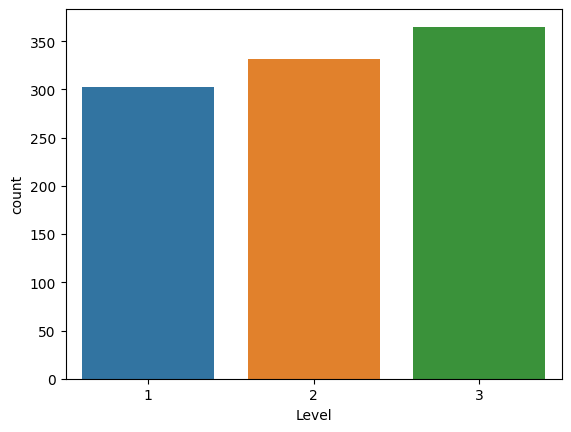

In [13]:
sn.countplot(data= data ,x='Level')

<Axes: >

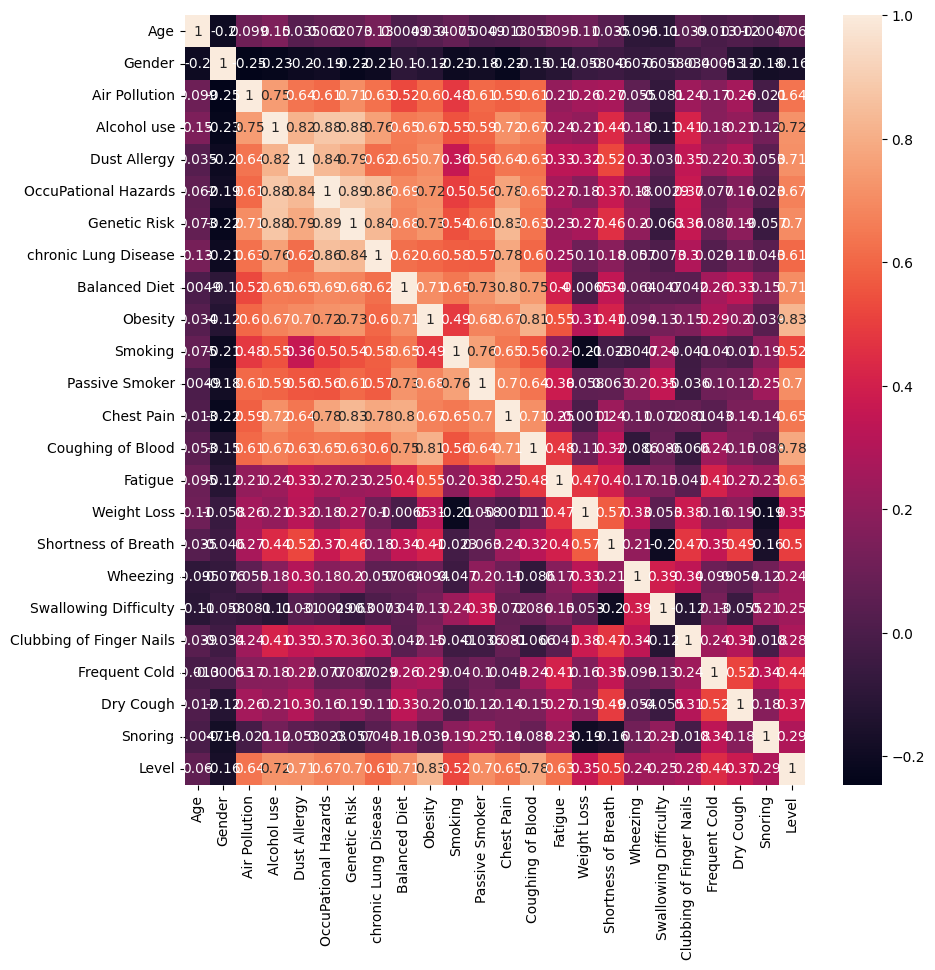

In [14]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr() ,annot = True)

In [15]:
data.duplicated().sum()

848

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(152, 24)

In [19]:
x = data.drop('Level' , axis=1)
y = data[['Level']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,random_state = 42 ,test_size = .30)

In [22]:
xtrain.shape

(106, 23)

In [23]:
xtest.shape

(46, 23)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
dtc.score(xtest,ytest)

0.9347826086956522

In [28]:
dtc.score(xtrain,ytrain)

1.0

In [29]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [30]:
cm = confusion_matrix(ytest,dtc.predict(xtest))
cm

array([[ 9,  1,  1],
       [ 0, 17,  0],
       [ 1,  0, 17]])

Text(0.5, 1.0, 'Confusion matrix')

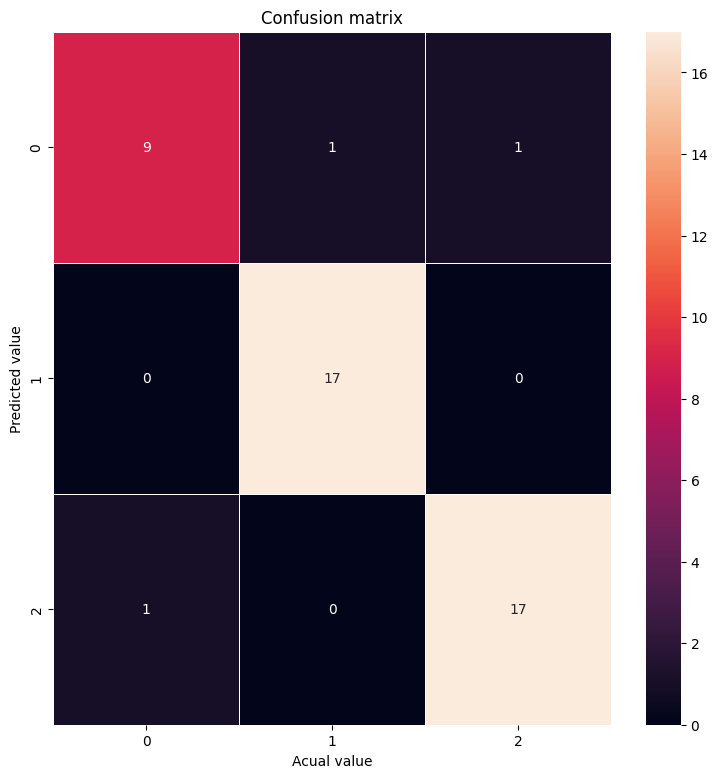

In [31]:
plt.figure(figsize=(9,9))
sn.heatmap(cm,annot = True ,linewidth=.5)
plt.xlabel('Acual value')
plt.ylabel('Predicted value')
plt.title('Confusion matrix')

In [32]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.94      1.00      0.97        17
           3       0.94      0.94      0.94        18

    accuracy                           0.93        46
   macro avg       0.93      0.92      0.92        46
weighted avg       0.93      0.93      0.93        46

